# House Price Prediction
## Multiple Linear regression
### Problem Statement
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants
- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.
- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.
- To know the accuracy of the model, i.e. how well these variables can predict house prices.

## 1. import Libraries

In [ ]:
import warnings #Supress Warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import Dataset (Housing Dataset)

In [ ]:
housing_df=pd.read_csv('Housing.csv')

## 3. Analyse Dataset

In [ ]:
#check the head of the dataset
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#check the tail of the dataset
housing_df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
#check the shape of the dataset
housing_df.shape

(545, 13)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## 4. Data Cleaning

In [ ]:
#Checking Null Values
housing_df.isnull().sum()



price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
# There is no null values in a dataset

In [ ]:
housing_df.shape

(545, 13)

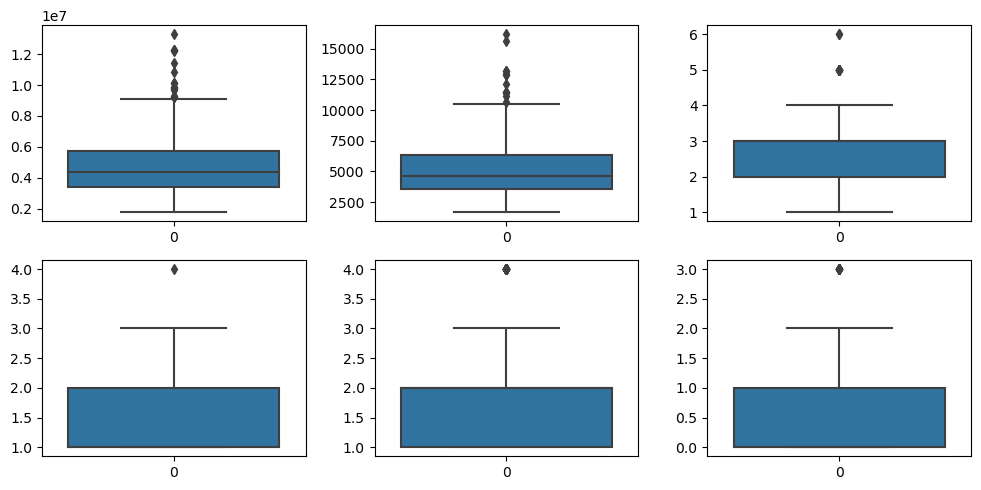

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing_df['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing_df['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing_df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing_df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing_df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing_df['parking'], ax = axs[1,2])

plt.tight_layout()

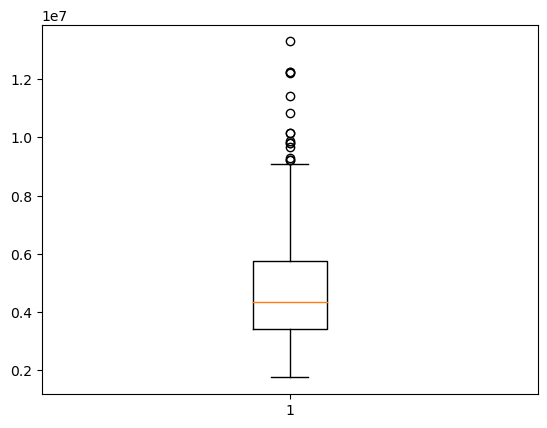

In [ ]:
# outlier treatment for price
plt.boxplot(housing_df.price)
Q1 = housing_df.price.quantile(0.25)
Q3 = housing_df.price.quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df.price >= Q1 - 1.5*IQR) & (housing_df.price <= Q3 + 1.5*IQR)]

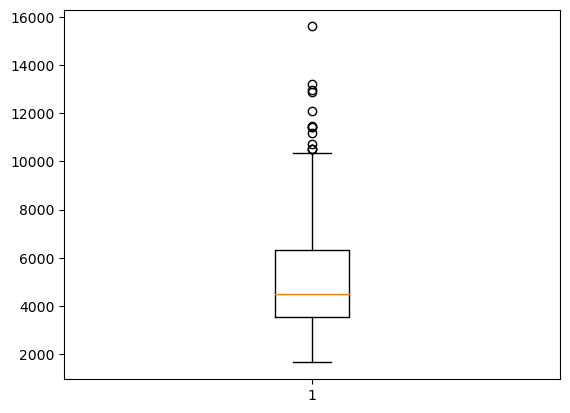

In [ ]:
# outlier treatment for area
plt.boxplot(housing_df.area)
Q1 = housing_df.area.quantile(0.25)
Q3 = housing_df.area.quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df.area >= Q1 - 1.5*IQR) & (housing_df.area <= Q3 + 1.5*IQR)]

In [ ]:
housing_df.shape

(517, 13)

## 5. Exploratory Data Analytics

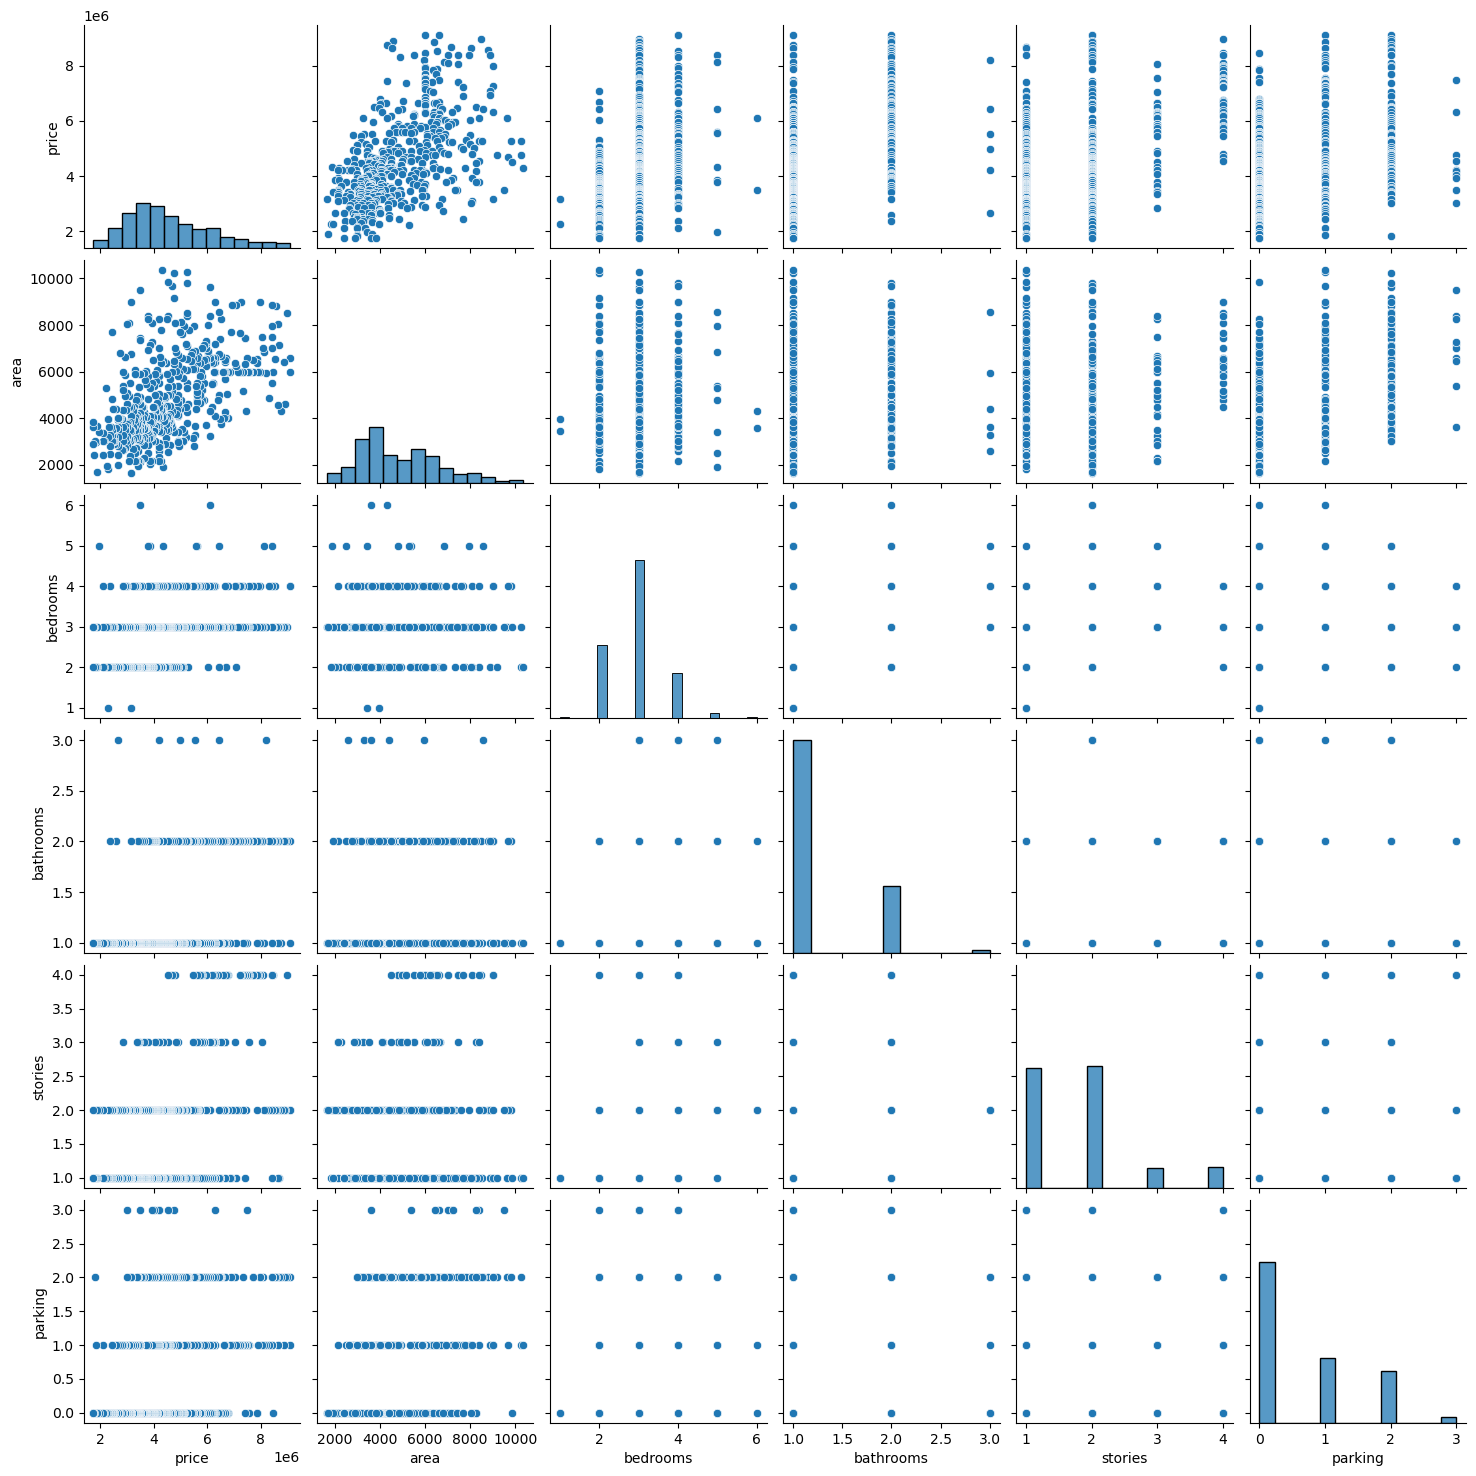

In [ ]:
sns.pairplot(housing_df)
plt.show()

In [ ]:
# ydata_profiling is a library which gives you a detailed report of the dataset
# from ydata_profiling import ProfileReport
# profile = ProfileReport(housing_df)
# profile.to_file(output_file='housing.html')

In [ ]:
housing_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
housing_df['bedrooms'].value_counts()

bedrooms
3    288
2    133
4     83
5      9
6      2
1      2
Name: count, dtype: int64

In [ ]:
housing_df['mainroad'].value_counts()

mainroad
yes    440
no      77
Name: count, dtype: int64

In [ ]:
housing_df['guestroom'].value_counts()

guestroom
no     425
yes     92
Name: count, dtype: int64

In [ ]:
housing_df['basement'].value_counts()

basement
no     338
yes    179
Name: count, dtype: int64

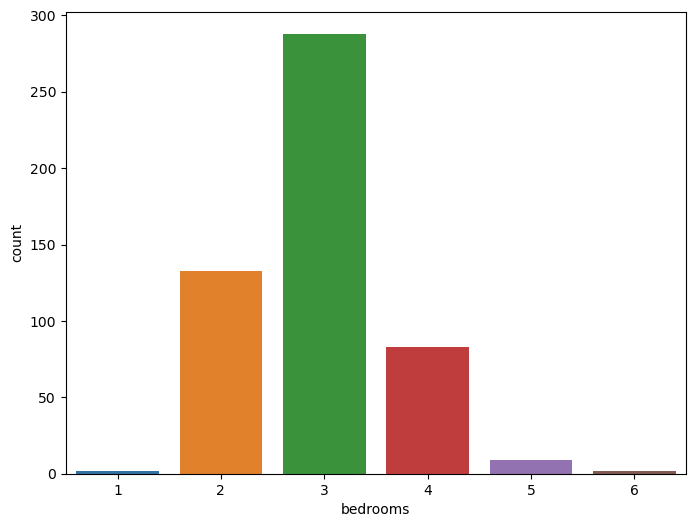

In [ ]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="bedrooms",data=housing_df)
plt.show()

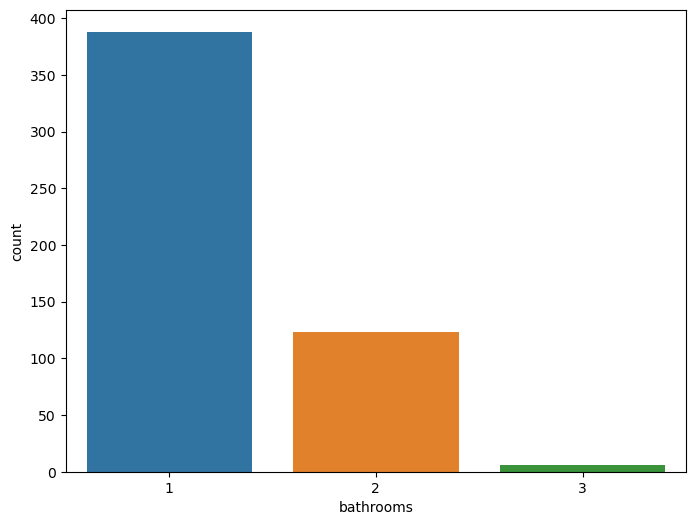

In [ ]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="bathrooms",data=housing_df)
plt.show()

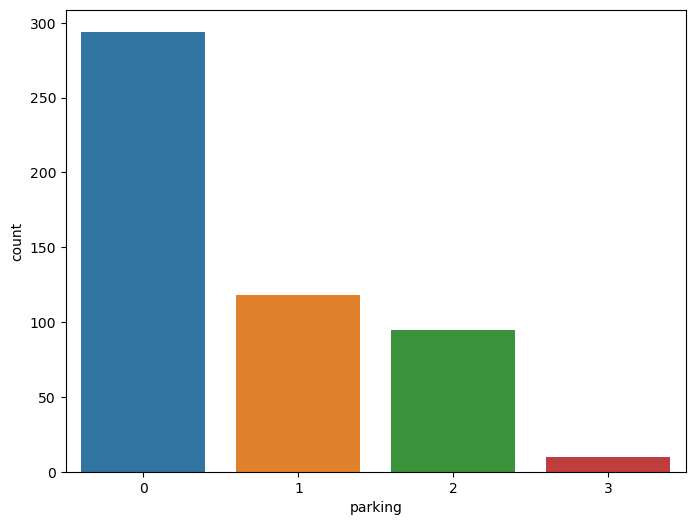

In [ ]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="parking",data=housing_df)
plt.show()

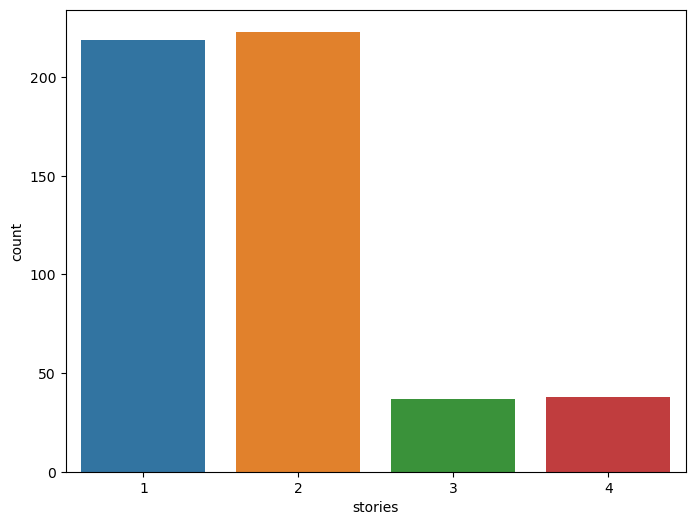

In [ ]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="stories",data=housing_df)
plt.show()

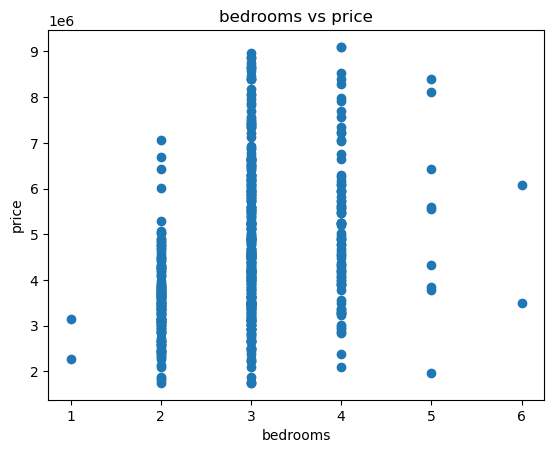

In [ ]:


def scatter_plot(data, x_col, y_col):
    plt.scatter(data[x_col], data[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{x_col} vs {y_col}')
    plt.show()
scatter_plot(housing_df, 'bedrooms', 'price')


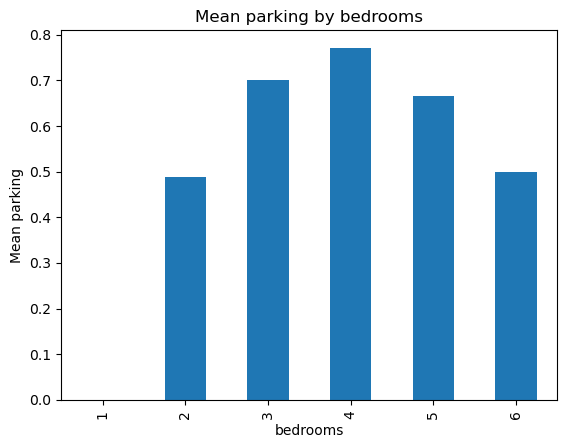

In [ ]:
def bar_plot(data, x_col, y_col):
    data.groupby(x_col)[y_col].mean().plot(kind='bar')
    plt.xlabel(x_col)
    plt.ylabel(f'Mean {y_col}')
    plt.title(f'Mean {y_col} by {x_col}')
    plt.show()
bar_plot(housing_df, 'bedrooms', 'parking')

In [ ]:
housing_df['price'].max()

9100000

In [ ]:
housing_df['price'].min()

1750000

<Axes: xlabel='mainroad', ylabel='price'>

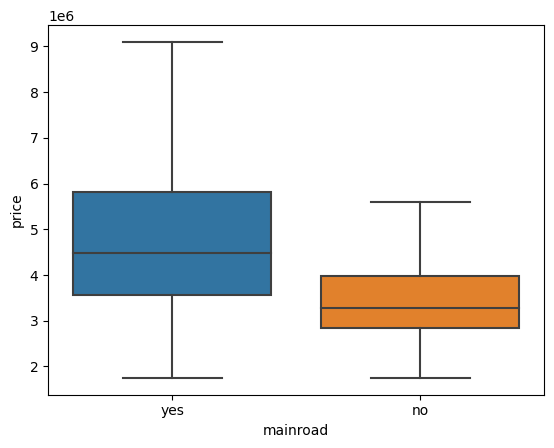

In [ ]:
# bi variate analysis
sns.boxplot(x='mainroad', y='price', data=housing_df)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             517 non-null    int64 
 1   area              517 non-null    int64 
 2   bedrooms          517 non-null    int64 
 3   bathrooms         517 non-null    int64 
 4   stories           517 non-null    int64 
 5   mainroad          517 non-null    object
 6   guestroom         517 non-null    object
 7   basement          517 non-null    object
 8   hotwaterheating   517 non-null    object
 9   airconditioning   517 non-null    object
 10  parking           517 non-null    int64 
 11  prefarea          517 non-null    object
 12  furnishingstatus  517 non-null    object
dtypes: int64(6), object(7)
memory usage: 56.5+ KB


In [ ]:
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## 6. Data Preparation for Machine Learning Model

- You can see that your dataset has many columns with values as 'Yes' or 'No'.
- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [ ]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing_df[varlist] = housing_df[varlist].apply(binary_map)

In [ ]:
# Check the housing dataframe now
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [ ]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing_df['furnishingstatus'])

In [ ]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


Now, you don't need three columns. You can drop the furnished column, as the type of furnishing can be identified with just the last two columns where

- 00 will correspond to furnished
- 01 will correspond to unfurnished
- 10 will correspond to semi-furnished

In [ ]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing_df['furnishingstatus'], drop_first = True)

In [ ]:
status.head()

,semi-furnished,unfurnished
15,True,False
16,False,True
17,False,False
18,False,False
19,True,False


In [ ]:

status['semi-furnished'] = status['semi-furnished'].astype(bool).astype(int)
status['unfurnished'] = status['unfurnished'].astype(bool).astype(int)


In [ ]:
status.head()

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0


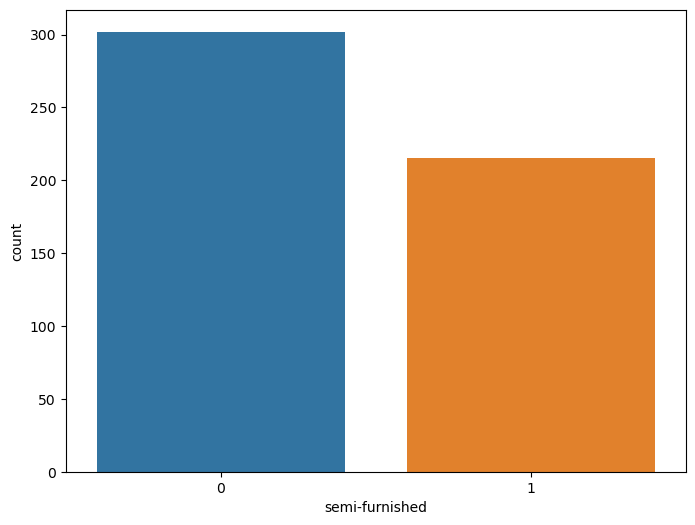

In [ ]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="semi-furnished",data=status)
plt.show()

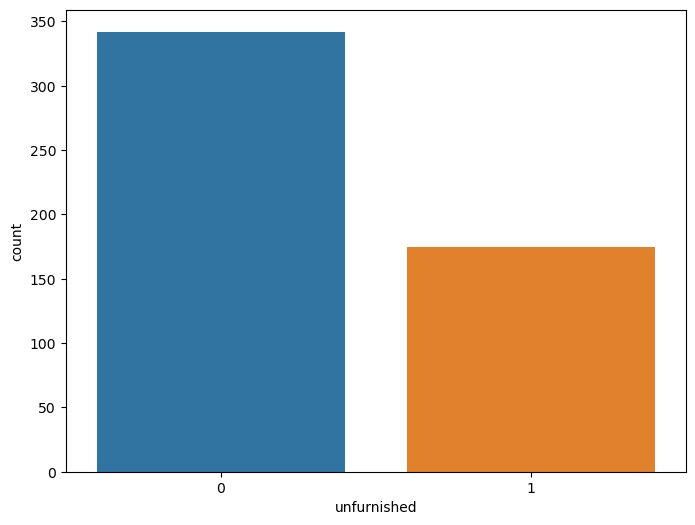

In [ ]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="unfurnished",data=status)
plt.show()

In [ ]:
# Add the results to the original housing dataframe
housing_df = pd.concat([housing_df, status], axis = 1)

In [ ]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [ ]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing_df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [ ]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


## 7. Splitting Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1


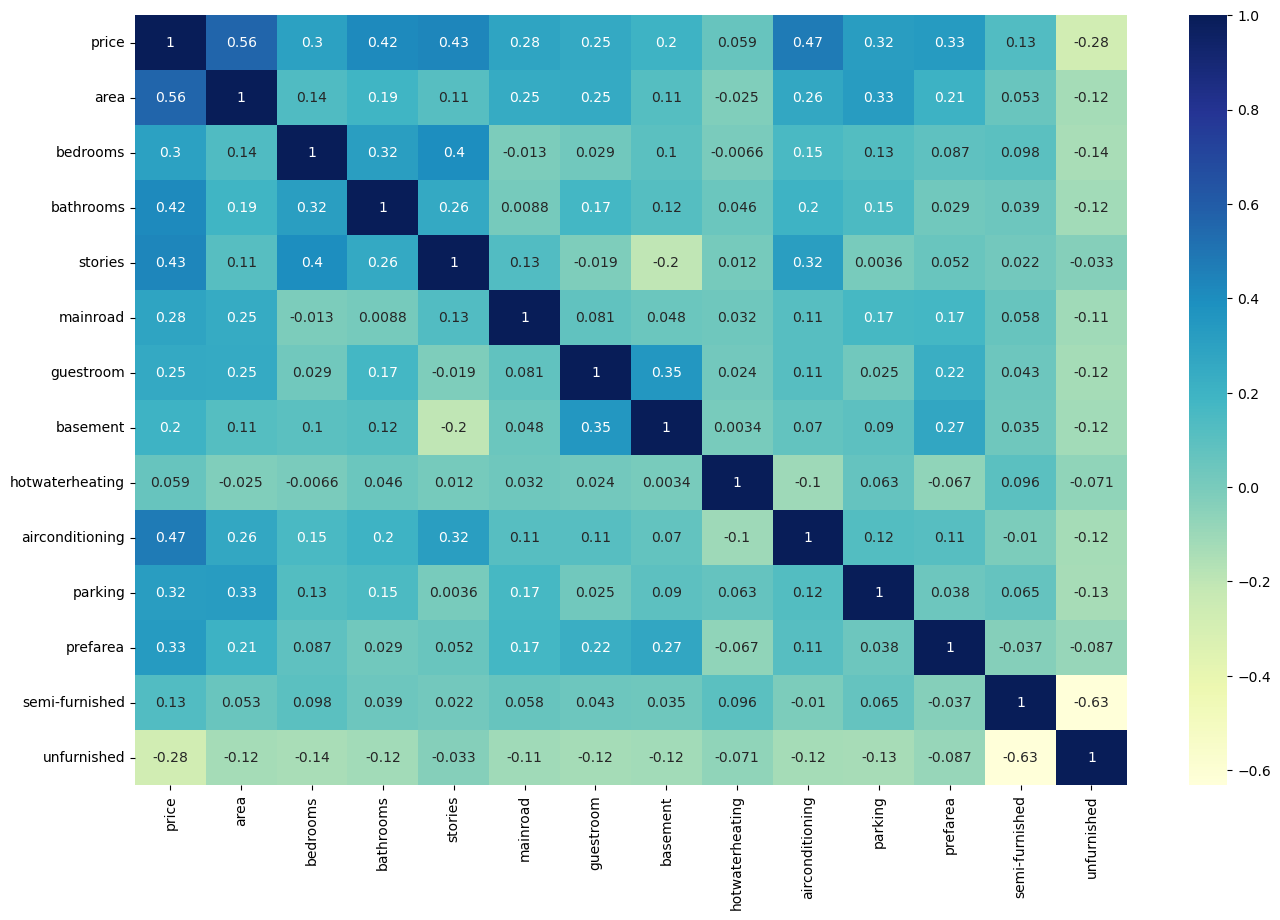

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

## 8. Model Building

### 8.1 Linear Regression

In [ ]:
#  LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [ ]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
y_pred=lm.predict(X_test)

In [ ]:

mse_1 = mean_squared_error(y_test, y_pred)
rmse_1 = mse_1 ** 0.5  # Calculate RMSE from MSE
r_squared_1 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_1}")
print(f"Root Mean Squared Error (RMSE): {rmse_1}")
print(f"R-squared: {r_squared_1}")

Mean Squared Error (MSE): 0.019074863482887325
Root Mean Squared Error (RMSE): 0.13811177894331578
R-squared: 0.6550019795069821


In [ ]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.470727,0.2,0.0,0.000000,1,0,0,0,1,0.333333,0,0,1
307,0.257244,0.4,0.0,0.333333,1,0,0,0,0,0.666667,0,1,0
72,0.368421,0.4,0.0,1.000000,1,0,0,0,1,0.000000,1,0,1
377,0.111768,0.4,0.5,0.333333,0,0,1,0,0,0.000000,1,0,1


### 8.2 Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters here

# Fitting the model on the training data
rf.fit(X_train, y_train)

# Predicting on the test set
predictions = rf.predict(X_test)

# Calculating accuracy metrics (for regression, it's common to use metrics like RMSE and R-squared)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5  # Calculate RMSE from MSE
r_squared = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r_squared}")


Mean Squared Error (MSE): 0.025059473068915743
Root Mean Squared Error (RMSE): 0.15830184164726493
R-squared: 0.546761180695728


In [ ]:
models = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Random Forest'
    ],

    'Testing R2 Score': [
        r_squared_1,
        r_squared
    ],

    'Testing Mean Square Error': [
        mse_1,
        mse
    ],
    'Root Mean Square Error': [
        rmse_1,
        rmse
    ]
})

In [ ]:
models

,Model,Testing R2 Score,Testing Mean Square Error,Root Mean Square Error
0,Linear Regression,0.655002,0.019075,0.138112
1,Random Forest,0.546761,0.025059,0.158302


## Model Save

In [ ]:
import pickle as pk
pk.dump(lm,open('model.pkl','wb'))

In [ ]:
X_train


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.470727,0.2,0.0,0.000000,1,0,0,0,1,0.333333,0,0,1
307,0.257244,0.4,0.0,0.333333,1,0,0,0,0,0.666667,0,1,0
72,0.368421,0.4,0.0,1.000000,1,0,0,0,1,0.000000,1,0,1
377,0.111768,0.4,0.5,0.333333,0,0,1,0,0,0.000000,1,0,1
